In [1]:
from model_v2 import Gadget
from plotting import plot_radial_concentration, plot_conc_and_surf_flux, plot_neutron_counts, plot_fission_rate_and_energy, plot_radius_and_pressure
import numpy as np

In [2]:
g0 = Gadget(id = 0,
           material = 'U235',
           initial_radius_cm = 8.93,
           initial_neutron_conc_perm3 = 0,
           initial_neutron_burst_conc_perm3 = 310000000, # ~8 neutrons
           time_step_s = 2E-10,
           num_points_radial = 100,
           neutron_multiplication_on = True,
           tamper_mass_kg=50)

g1 = Gadget(id = 0,
           material = 'U235',
           initial_radius_cm = 8.93,
           initial_neutron_conc_perm3 = 0,
           initial_neutron_burst_conc_perm3 = 310000000, # ~8 neutrons
           time_step_s = 2E-10,
           num_points_radial = 100,
           neutron_multiplication_on = True,
           tamper_mass_kg=250)

g2 = Gadget(id = 1,
           material = 'U235',
           initial_radius_cm = 8.93,
           initial_neutron_conc_perm3 = 0,
           initial_neutron_burst_conc_perm3 = 310000000, # ~8 neutrons
           time_step_s = 2E-10,
           num_points_radial = 100,
           neutron_multiplication_on = True,
           tamper_mass_kg=550)

gadget_list = [g0, g1, g2]


In [3]:
for g in gadget_list:
    print(f'Working on gadget id: {g.id}')
    for i in range(15000):
        if g.list_total_number_of_fissions[-1] >= g.number_active_nuclei:
            print('All active nuclei fissioned')
            break
        g.run_sim_step()
    g.post_process()

Working on gadget id: 0
Working on gadget id: 0
Working on gadget id: 1


In [4]:
for g in gadget_list:

    print('************')
    print(f'Gadget id: {g.id}')
    second_crit_idx = np.argmax(g.array_total_energy_released_kt)
    #print(second_crit_idx)
    second_crit_idx_v2 = np.argmax(g.array_fission_rate_pers)
    #print(second_crit_idx_v2)
    print(f'Yield (kt): {g.array_total_energy_released_kt[second_crit_idx]:.2f}')
    print(f'Efficiency (%): {100 * (g.array_total_energy_released_kt[second_crit_idx] / g.maximum_possible_energy_kt):.2f}')
    print(f'Radius at 2nd criticality (cm): {100 * g.list_radius_m[second_crit_idx]:.2f}')
    print('************\n')

************
Gadget id: 0
Yield (kt): 1.95
Efficiency (%): 0.21
Radius at 2nd criticality (cm): 13.11
************

************
Gadget id: 0
Yield (kt): 5.65
Efficiency (%): 0.60
Radius at 2nd criticality (cm): 11.88
************

************
Gadget id: 1
Yield (kt): 11.19
Efficiency (%): 1.18
Radius at 2nd criticality (cm): 11.20
************



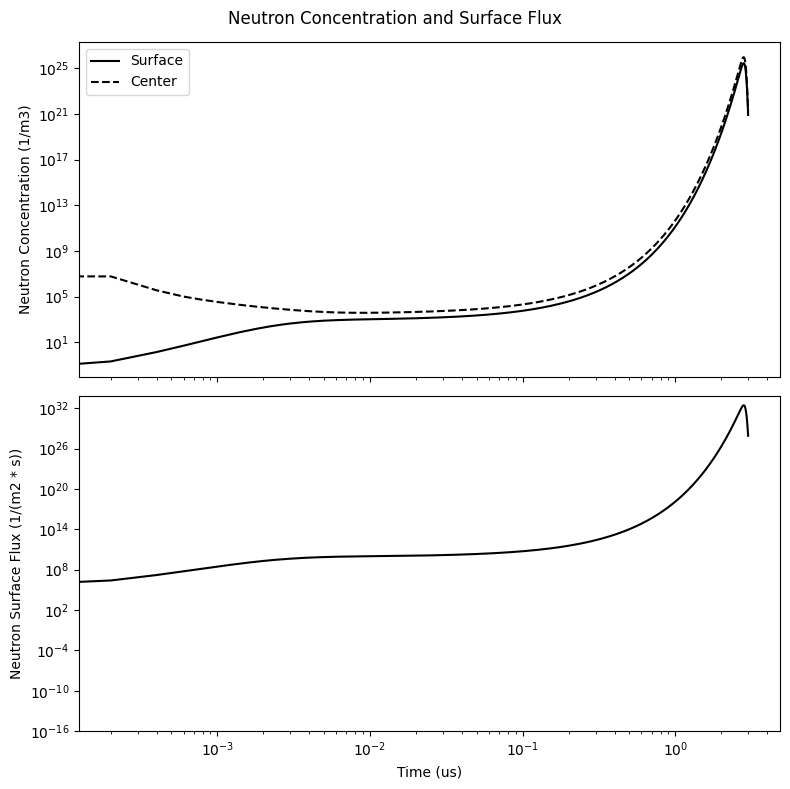

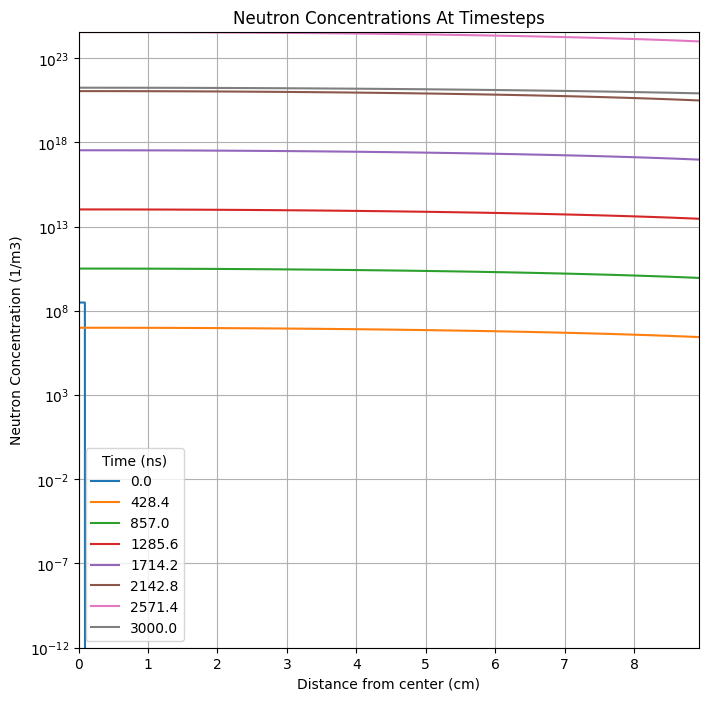

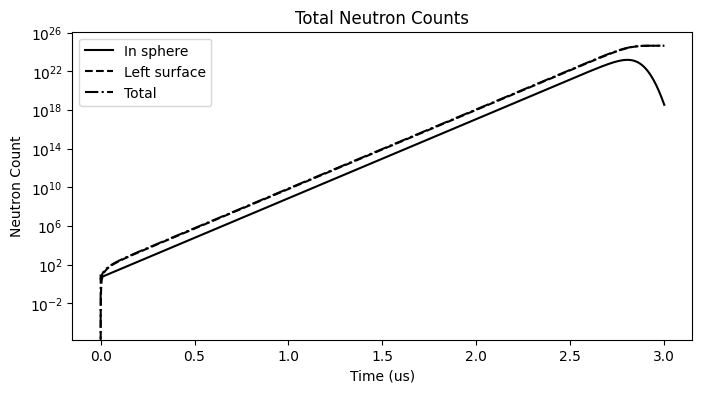

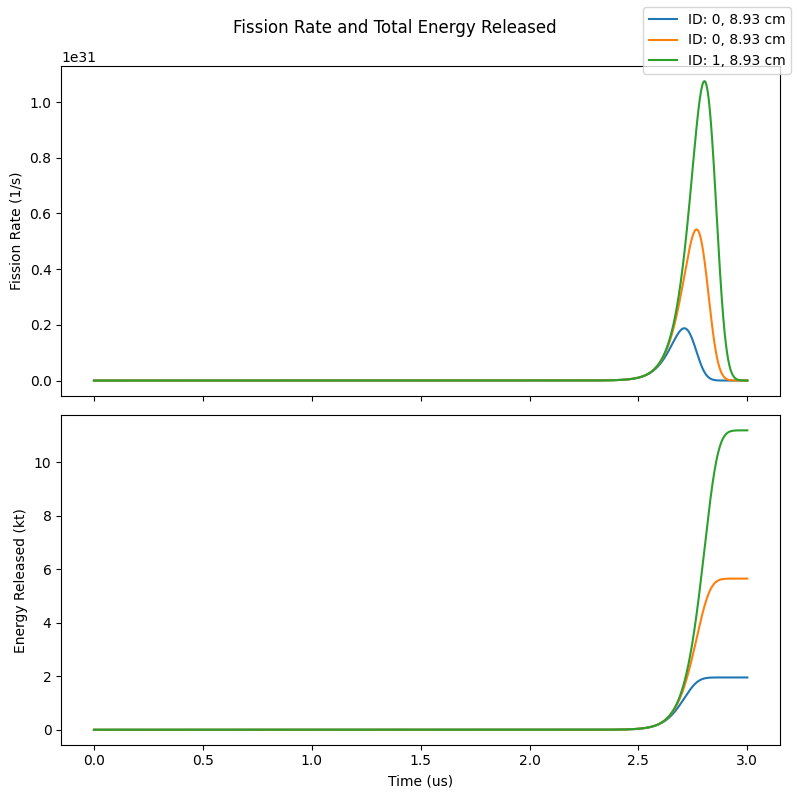

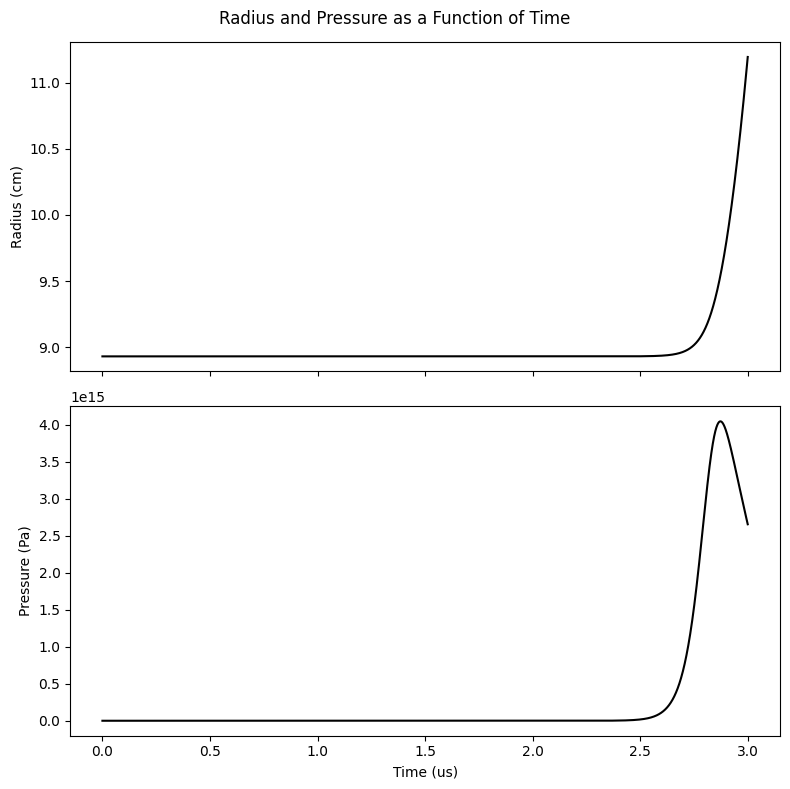

In [5]:
plot_conc_and_surf_flux(gadget=g)
plot_radial_concentration(gadget=g)
plot_neutron_counts(gadget=g)
plot_fission_rate_and_energy(gadget_list=gadget_list)
plot_radius_and_pressure(gadget=g)